In [2]:
#import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import levene

#reads the dataframe 
df = pd.read_csv('all_conditioning.csv')
df


,Unnamed: 0,positive,negative,happiness,pride,sympathy,relief,hope,friendly feeling,sadness,...,resentment,fear of troubling someone else,responsible for others,responsible for myself,motivation,system,culture,situation,status,condition
0,0,3,2,4,5,3,2,4,3,2,...,0,0,2.0,3.0,1.0,mistral-7b-instruct,us,You receive a stellar performance review and a...,self-success,en_en
1,1,3,2,4,3,4,2,3,2,3,...,0,1,3.0,3.0,3.0,mistral-7b-instruct,us,"After a challenging match, you win first place...",self-success,en_en
2,2,4,2,4,3,2,0,5,4,1,...,0,0,3.0,3.0,2.0,mistral-7b-instruct,us,]You audition for a play and secure the lead r...,self-success,en_en
3,3,3,2,4,3,4,5,3,5,0,...,0,0,3.0,4.0,3.0,mistral-7b-instruct,us,"In a group project, you receive an A grade, wh...",self-success,en_en
4,4,3,2,5,4,4,3,2,5,1,...,0,0,3.0,4.0,2.0,mistral-7b-instruct,us,Your artwork receives widespread praise and se...,self-success,en_en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,3,2,3,4,0,0,2,4,3,...,0,0,2.0,3.0,2.0,gpt-4-turbo-preview,japanese,親友がスポーツの試合で１位という好成績を収めました。あなたも誇らしく感じました。 ...,self-failure,jp_jp
15996,15996,3,2,2,4,0,0,2,3,3,...,1,0,3.0,4.0,2.0,gpt-4-turbo-preview,japanese,いとこの作品が一流ギャラリーの展示会で特集され、批評家からの称賛と注目を集め、あなたは誇らし...,self-failure,jp_jp
15997,15997,3,2,3,4,0,0,2,3,3,...,1,0,3.0,2.0,2.0,gpt-4-turbo-preview,japanese,親友が一流企業で希望の職種に就き成功を収め、あなたもその成果に誇りを感じます。 ...,self-failure,jp_jp
15998,15998,1,3,0,2,0,0,1,3,3,...,1,1,2.0,3.0,1.0,gpt-4-turbo-preview,japanese,親しい友人が社交の場で注目の的となり、友人やコネを楽々と築き、 ...,self-failure,jp_jp


In [3]:
df.columns

Index(['Unnamed: 0', 'positive', 'negative', 'happiness', 'pride', 'sympathy',
       'relief', 'hope', 'friendly feeling', 'sadness', 'anxiety', 'anger',
       'self-blame', 'fear', 'anger at oneself', 'shame', 'guilt', 'jealousy',
       'frustration', 'embarrassment', 'resentment',
       'fear of troubling someone else', 'responsible for others',
       'responsible for myself', 'motivation', 'system', 'culture',
       'situation', 'status', 'condition'],
      dtype='object')

In [4]:
#drops unnecessary column 
df = df.drop(['Unnamed: 0'], axis=1)
df

,positive,negative,happiness,pride,sympathy,relief,hope,friendly feeling,sadness,anxiety,...,resentment,fear of troubling someone else,responsible for others,responsible for myself,motivation,system,culture,situation,status,condition
0,3,2,4,5,3,2,4,3,2,1,...,0,0,2.0,3.0,1.0,mistral-7b-instruct,us,You receive a stellar performance review and a...,self-success,en_en
1,3,2,4,3,4,2,3,2,3,1,...,0,1,3.0,3.0,3.0,mistral-7b-instruct,us,"After a challenging match, you win first place...",self-success,en_en
2,4,2,4,3,2,0,5,4,1,0,...,0,0,3.0,3.0,2.0,mistral-7b-instruct,us,]You audition for a play and secure the lead r...,self-success,en_en
3,3,2,4,3,4,5,3,5,0,0,...,0,0,3.0,4.0,3.0,mistral-7b-instruct,us,"In a group project, you receive an A grade, wh...",self-success,en_en
4,3,2,5,4,4,3,2,5,1,2,...,0,0,3.0,4.0,2.0,mistral-7b-instruct,us,Your artwork receives widespread praise and se...,self-success,en_en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,3,2,3,4,0,0,2,4,3,2,...,0,0,2.0,3.0,2.0,gpt-4-turbo-preview,japanese,親友がスポーツの試合で１位という好成績を収めました。あなたも誇らしく感じました。 ...,self-failure,jp_jp
15996,3,2,2,4,0,0,2,3,3,2,...,1,0,3.0,4.0,2.0,gpt-4-turbo-preview,japanese,いとこの作品が一流ギャラリーの展示会で特集され、批評家からの称賛と注目を集め、あなたは誇らし...,self-failure,jp_jp
15997,3,2,3,4,0,0,2,3,3,4,...,1,0,3.0,2.0,2.0,gpt-4-turbo-preview,japanese,親友が一流企業で希望の職種に就き成功を収め、あなたもその成果に誇りを感じます。 ...,self-failure,jp_jp
15998,1,3,0,2,0,0,1,3,3,4,...,1,1,2.0,3.0,1.0,gpt-4-turbo-preview,japanese,親しい友人が社交の場で注目の的となり、友人やコネを楽々と築き、 ...,self-failure,jp_jp


In [5]:
#looks at unique values in "condition" column
conditions = df['condition'].unique()
conditions

array(['en_en', 'en_jp', 'jp_en', 'jp_jp'], dtype=object)

In [6]:
#looks at unique values in "status" column
statuses = df['status'].unique()
statuses

array(['self-success', 'self-failure'], dtype=object)

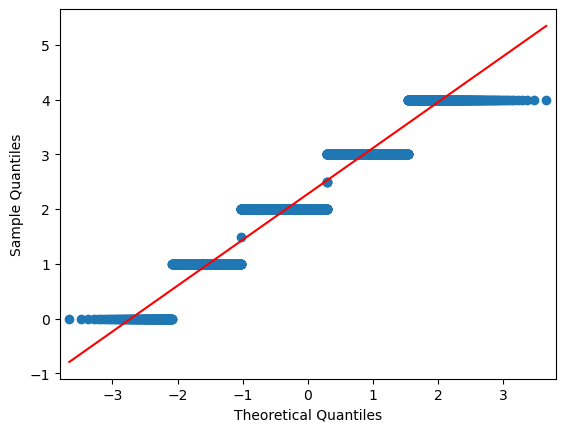

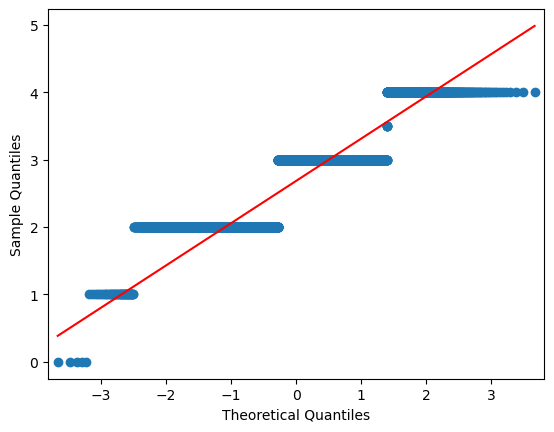

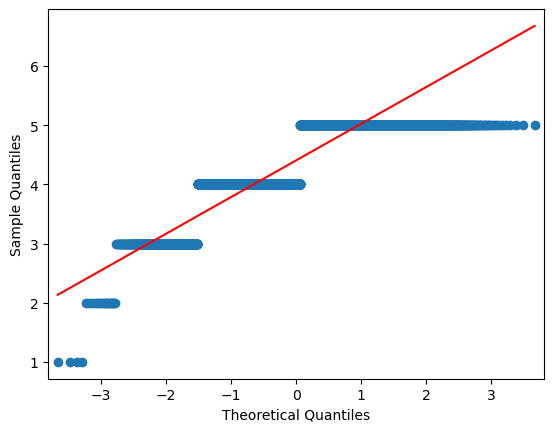

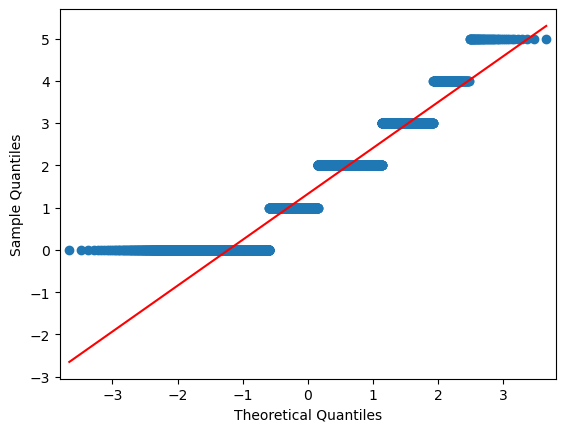

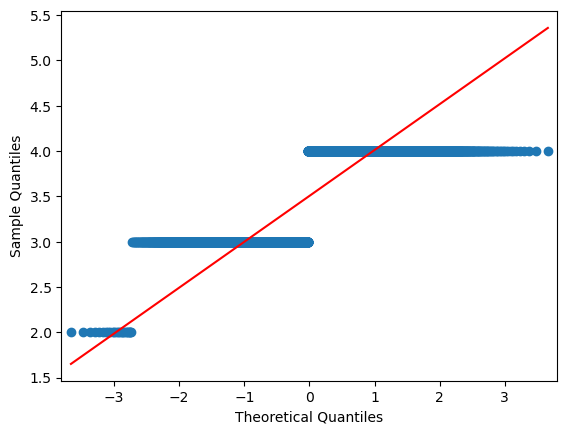

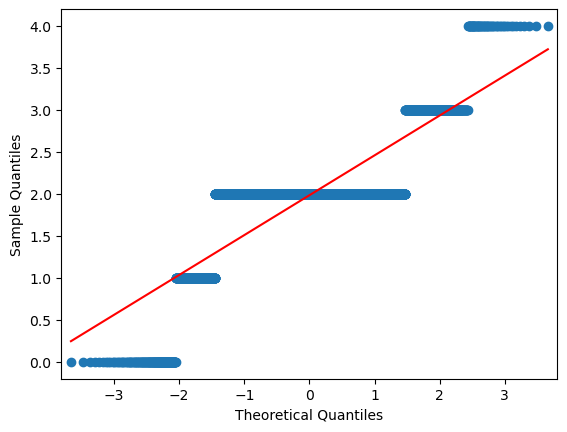

In [7]:
#checks for 
ss_df = df[df['status'] == 'self-success']
emotions = ['motivation', 'responsible for others', 'happiness', 'fear of troubling someone else', 'positive', 'negative']
for emotion in emotions: 
    qqplot(ss_df[emotion], line='s')
    plt.show()

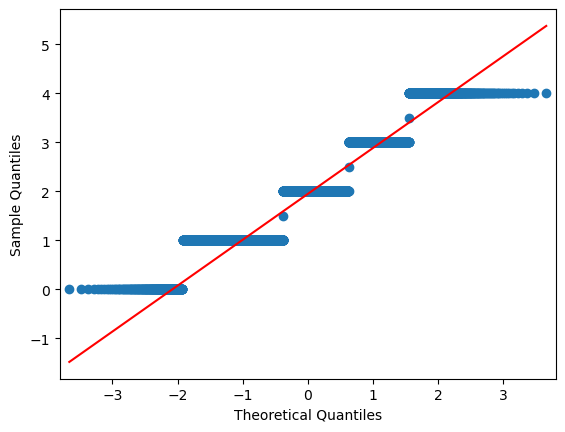

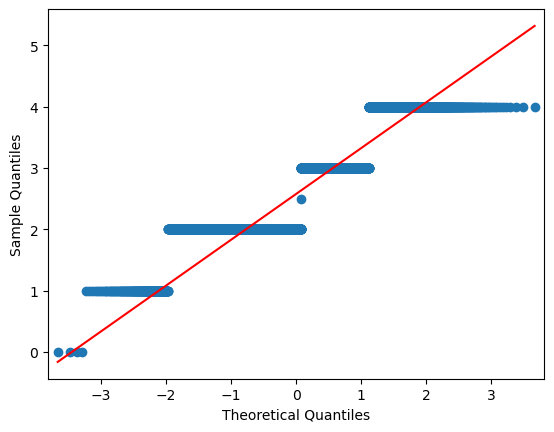

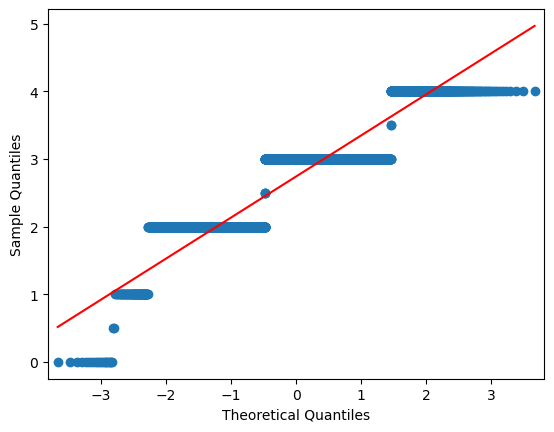

In [8]:
sf_df = df[df['status'] == 'self-failure']
emotions = ['motivation', 'responsible for others', 'responsible for myself']
for emotion in emotions: 
    qqplot(sf_df[emotion], line='s')
    plt.show()

In [9]:
#creates values for a new column called "origin"
df['origin'] = df['condition'].map({'en_en': 'united states', 'en_jp': 'japan',  'jp_en': 'united states', 'jp_jp': 'japan'})

In [10]:
#creates values for a new column called "language"
df['language'] = df['condition'].map({'en_en': 'english', 'en_jp': 'english', 'jp_en': 'japanese', 'jp_jp': 'japanese'})

In [11]:
df.head()

,positive,negative,happiness,pride,sympathy,relief,hope,friendly feeling,sadness,anxiety,...,responsible for others,responsible for myself,motivation,system,culture,situation,status,condition,origin,language
0,3,2,4,5,3,2,4,3,2,1,...,2.0,3.0,1.0,mistral-7b-instruct,us,You receive a stellar performance review and a...,self-success,en_en,united states,english
1,3,2,4,3,4,2,3,2,3,1,...,3.0,3.0,3.0,mistral-7b-instruct,us,"After a challenging match, you win first place...",self-success,en_en,united states,english
2,4,2,4,3,2,0,5,4,1,0,...,3.0,3.0,2.0,mistral-7b-instruct,us,]You audition for a play and secure the lead r...,self-success,en_en,united states,english
3,3,2,4,3,4,5,3,5,0,0,...,3.0,4.0,3.0,mistral-7b-instruct,us,"In a group project, you receive an A grade, wh...",self-success,en_en,united states,english
4,3,2,5,4,4,3,2,5,1,2,...,3.0,4.0,2.0,mistral-7b-instruct,us,Your artwork receives widespread praise and se...,self-success,en_en,united states,english


In [12]:
ss_df = df[df['status'] == 'self-success']
emotions = ['motivation', 'responsible for others', 'happiness', 'fear of troubling someone else', 'positive', 'negative']
for emotion in emotions: 
    print(f'{emotion} : ' + str(levene(ss_df[emotion][ss_df['origin'] == 'united states'], ss_df[emotion][ss_df['origin'] == 'japan'],center = 'mean')))

motivation : LeveneResult(statistic=9.788959808984819, pvalue=0.0017619376248344581)
responsible for others : LeveneResult(statistic=38.058440303688904, pvalue=7.199552599196177e-10)
happiness : LeveneResult(statistic=1.1161616160299546, pvalue=0.29077837096975795)
fear of troubling someone else : LeveneResult(statistic=23.527037796828125, pvalue=1.254972838331844e-06)
positive : LeveneResult(statistic=11.369621274721702, pvalue=0.0007500899479448342)
negative : LeveneResult(statistic=0.005036885807645981, pvalue=0.9434225937266801)


In [13]:
ss_df = df[df['status'] == 'self-success']
emotions = ['motivation', 'responsible for others', 'happiness', 'fear of troubling someone else', 'positive', 'negative']
for emotion in emotions: 
    print(f'{emotion} : ' + str(levene(ss_df[emotion][ss_df['language'] == 'english'], ss_df[emotion][ss_df['language'] == 'japanese'],center = 'mean')))

motivation : LeveneResult(statistic=407.8723995472644, pvalue=1.6689175346607782e-88)
responsible for others : LeveneResult(statistic=28.644174745518495, pvalue=8.938672783094322e-08)
happiness : LeveneResult(statistic=798.8736390378571, pvalue=1.3315287323126178e-167)
fear of troubling someone else : LeveneResult(statistic=0.14245922475669134, pvalue=0.7058583620547938)
positive : LeveneResult(statistic=9.021225319928948, pvalue=0.0026768824111370374)
negative : LeveneResult(statistic=47.25570369259988, pvalue=6.698571216904614e-12)


In [14]:
sf_df = df[df['status'] == 'self-failure']
emotions = ['motivation', 'responsible for others', 'responsible for myself']
for emotion in emotions: 
    print(f'{emotion} : ' + str(levene(sf_df[emotion][sf_df['origin'] == 'united states'], sf_df[emotion][sf_df['origin'] == 'japan'],center = 'mean'))) 

motivation : LeveneResult(statistic=2.44613301103303, pvalue=0.11785435292180878)
responsible for others : LeveneResult(statistic=28.687572660887195, pvalue=8.74128144514389e-08)
responsible for myself : LeveneResult(statistic=1.0188040125733488, pvalue=0.3128334035084767)


In [15]:
sf_df = df[df['status'] == 'self-failure']
emotions = ['motivation', 'responsible for others', 'responsible for myself']
for emotion in emotions: 
    print(f'{emotion} : ' + str(levene(sf_df[emotion][sf_df['language'] == 'english'], sf_df[emotion][sf_df['language'] == 'japanese'],center = 'mean'))) 

motivation : LeveneResult(statistic=619.0931746401914, pvalue=1.087333194895415e-131)
responsible for others : LeveneResult(statistic=260.2892755742332, pvalue=1.1985115621233882e-57)
responsible for myself : LeveneResult(statistic=26.344593506136317, pvalue=2.92340649644978e-07)


In [16]:
import sklearn

In [17]:
!pip install scikit-posthocs

In [18]:
!pip3 install prettytable

In [19]:
import pandas as pd
import scikit_posthocs as sp

# Filter the DataFrame for self-success cases
ss_df = df[df['status'] == 'self-success']

# List of emotions to analyze
emotions = ['motivation', 'responsible for others', 'happiness', 'fear of troubling someone else', 'positive', 'negative']

# Loop through each emotion and apply Dunn's posthoc test
for emotion in emotions:
    # Create a long format DataFrame with emotion scores and language groups
    emotion_data = pd.DataFrame({
        'Score': ss_df[emotion],
        'Language': ss_df['language']
    })

    # Perform Dunn's posthoc test with Bonferroni correction
    result = sp.posthoc_dunn(emotion_data, val_col='Score', group_col='Language', p_adjust='bonferroni')
    
    print(f"Posthoc results for {emotion}:")
    display(result)


Posthoc results for motivation:


,english,japanese
english,1.0,0.0
japanese,0.0,1.0


Posthoc results for responsible for others:


,english,japanese
english,1.000000e+00,9.403142e-27
japanese,9.403142e-27,1.000000e+00


Posthoc results for happiness:


,english,japanese
english,1.000000e+00,8.981299e-42
japanese,8.981299e-42,1.000000e+00


Posthoc results for fear of troubling someone else:


,english,japanese
english,1.000000e+00,2.292191e-290
japanese,2.292191e-290,1.000000e+00


Posthoc results for positive:


,english,japanese
english,1.000000e+00,1.030321e-31
japanese,1.030321e-31,1.000000e+00


Posthoc results for negative:


,english,japanese
english,1.000000e+00,6.804784e-08
japanese,6.804784e-08,1.000000e+00


In [20]:
import pandas as pd
import scikit_posthocs as sp

# List of emotions to analyze
emotions = ['motivation', 'responsible for others', 'happiness', 'fear of troubling someone else', 'positive', 'negative']

# Loop through each emotion and apply Dunn's posthoc test
for emotion in emotions:
    # Create a long format DataFrame with emotion scores and language groups
    emotion_data = pd.DataFrame({
        'Score': ss_df[emotion],
        'Origin': ss_df['origin']
    })

    # Perform Dunn's posthoc test with Bonferroni correction
    result = sp.posthoc_dunn(emotion_data, val_col='Score', group_col='Origin', p_adjust='bonferroni')
    
    print(f"Posthoc results for {emotion}:")
    display(result)

Posthoc results for motivation:


,japan,united states
japan,1.000000,0.008165
united states,0.008165,1.000000


Posthoc results for responsible for others:


,japan,united states
japan,1.000000e+00,1.230503e-13
united states,1.230503e-13,1.000000e+00


Posthoc results for happiness:


,japan,united states
japan,1.000000,0.030689
united states,0.030689,1.000000


Posthoc results for fear of troubling someone else:


,japan,united states
japan,1.000000,0.000005
united states,0.000005,1.000000


Posthoc results for positive:


,japan,united states
japan,1.000000,0.000003
united states,0.000003,1.000000


Posthoc results for negative:


,japan,united states
japan,1.000000,0.445719
united states,0.445719,1.000000


In [21]:
import pandas as pd
import scikit_posthocs as sp

# Filter the DataFrame for self-success cases
sf_df = df[df['status'] == 'self-failure']

# List of emotions to analyze
emotions = ['motivation', 'responsible for others', 'responsible for myself']
# Loop through each emotion and apply Dunn's posthoc test
for emotion in emotions:
    # Create a long format DataFrame with emotion scores and language groups
    emotion_data = pd.DataFrame({
        'Score': sf_df[emotion],
        'Language': sf_df['language']
    })

    # Perform Dunn's posthoc test with Bonferroni correction
    result = sp.posthoc_dunn(emotion_data, val_col='Score', group_col='Language', p_adjust='bonferroni')
    
    print(f"Posthoc results for {emotion}:")
    display(result)


Posthoc results for motivation:


,english,japanese
english,1.0,0.0
japanese,0.0,1.0


Posthoc results for responsible for others:


,english,japanese
english,1.000000,0.018183
japanese,0.018183,1.000000


Posthoc results for responsible for myself:


,english,japanese
english,1.000000,0.185293
japanese,0.185293,1.000000


In [22]:
import pandas as pd
import scikit_posthocs as sp

# List of emotions t[o analyze
emotions = ['motivation', 'responsible for others', 'responsible for myself']
# Loop through each emotion and apply Dunn's posthoc test
for emotion in emotions:
    # Create a long format DataFrame with emotion scores and language groups
    emotion_data = pd.DataFrame({
        'Score': sf_df[emotion],
        'Origin': sf_df['origin']
    })

    # Perform Dunn's posthoc test with Bonferroni correction
    result = sp.posthoc_dunn(emotion_data, val_col='Score', group_col='Origin', p_adjust='bonferroni')
    
    print(f"Posthoc results for {emotion}:")
    display(result)


Posthoc results for motivation:


,japan,united states
japan,1.000000,0.000004
united states,0.000004,1.000000


Posthoc results for responsible for others:


,japan,united states
japan,1.000000,0.040362
united states,0.040362,1.000000


Posthoc results for responsible for myself:


,japan,united states
japan,1.000000,0.010053
united states,0.010053,1.000000


<Figure size 800x600 with 0 Axes>

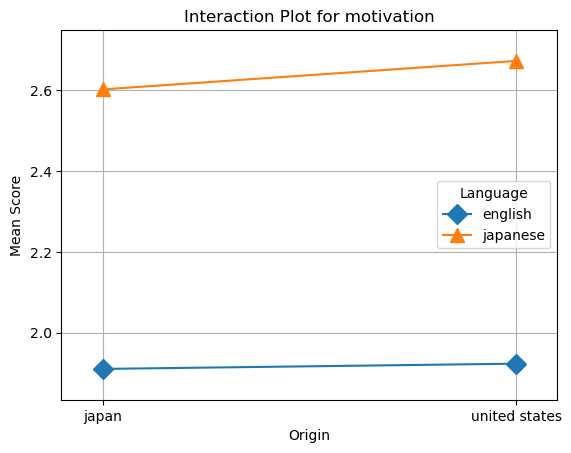

<Figure size 800x600 with 0 Axes>

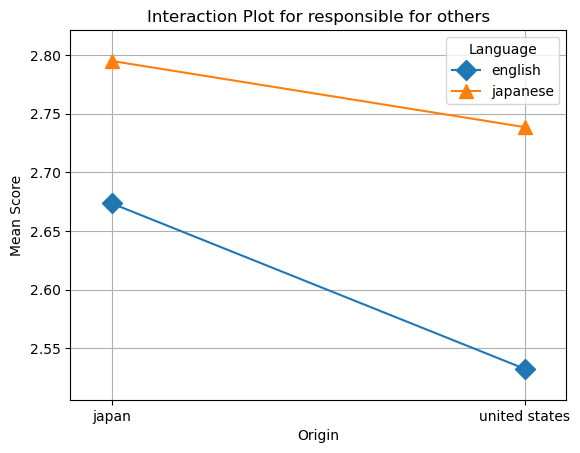

<Figure size 800x600 with 0 Axes>

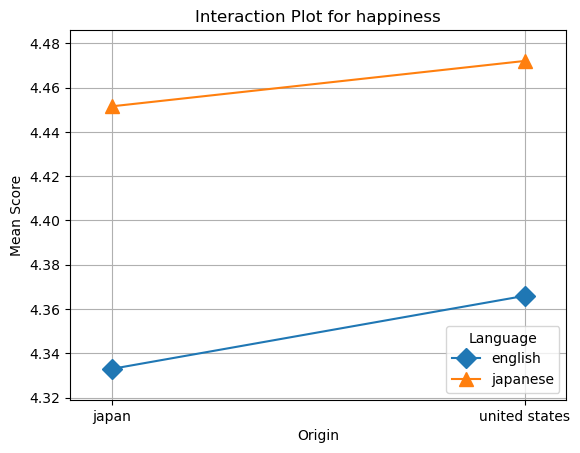

<Figure size 800x600 with 0 Axes>

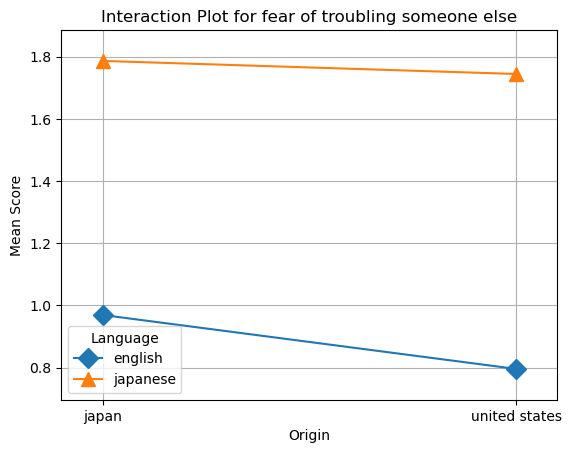

<Figure size 800x600 with 0 Axes>

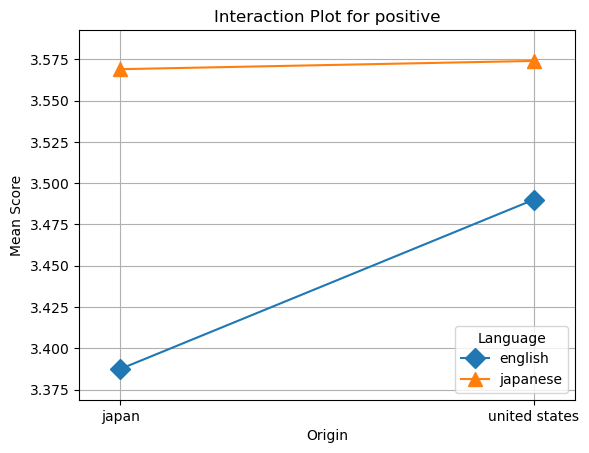

<Figure size 800x600 with 0 Axes>

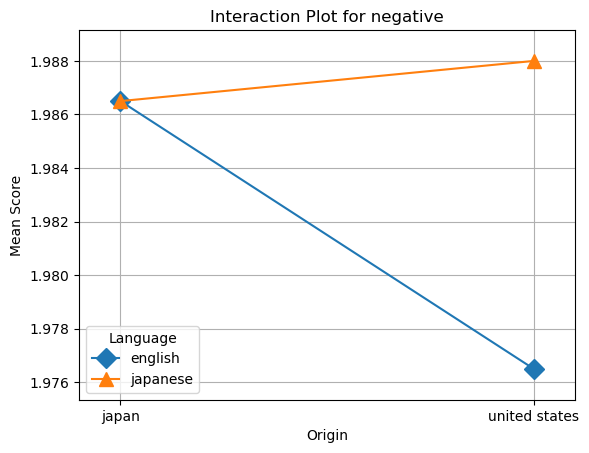

In [23]:

# List of emotions to analyze
emotions = ['motivation', 'responsible for others', 'happiness', 'fear of troubling someone else', 'positive', 'negative']


# Loop through each emotion and create interaction plot
for emotion in emotions:
    plt.figure(figsize=(8, 6))
    
    # Generate the interaction plot for the specific emotion
    interaction_plot(
        ss_df['origin'],          # x-axis (self-success or self-failure)
        ss_df['language'],        # Grouping variable (English or Japanese)
        ss_df[emotion],           # Dependent variable (emotion score)
        colors=['#1f77b4', '#ff7f0e'],  # Colors for each language group
        markers=['D', '^'],     # Markers for each language group
        ms=10                   # Marker size
    )
    
    # Customize plot labels and title
    plt.xlabel('Origin')
    plt.ylabel('Mean Score')
    plt.title(f'Interaction Plot for {emotion}')
    plt.grid(True)
    plt.legend(title='Language')
    plt.show()


       positive  negative  happiness  pride  sympathy  relief  hope  \
5             3         2          4      5         3       2     2   
6             3         3          5      4         3       2     1   
7             4         2          3      5         4       0     2   
8             3         3          3      5         2       0     1   
9             3         2          3      4         2       0     3   
...         ...       ...        ...    ...       ...     ...   ...   
15995         3         2          3      4         0       0     2   
15996         3         2          2      4         0       0     2   
15997         3         2          3      4         0       0     2   
15998         1         3          0      2         0       0     1   
15999         2         3          2      2         0       0     2   

       friendly feeling  sadness  anxiety  ...  responsible for others  \
5                     4        2        1  ...                     3.0   

<Figure size 800x600 with 0 Axes>

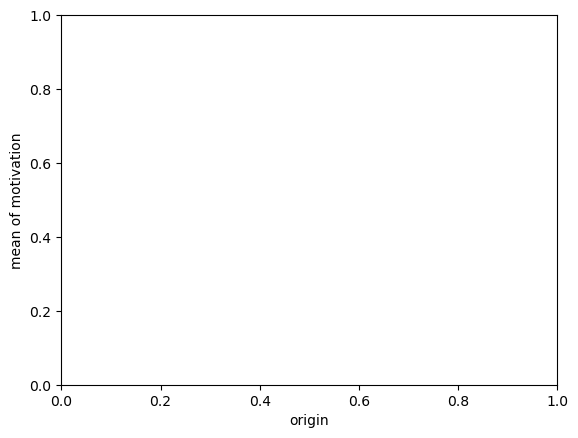

<Figure size 800x600 with 0 Axes>

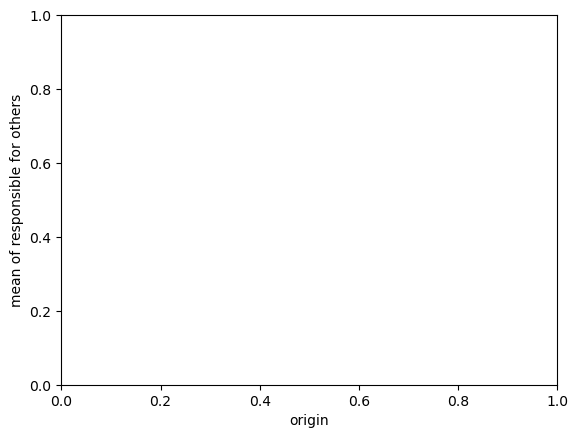

<Figure size 800x600 with 0 Axes>

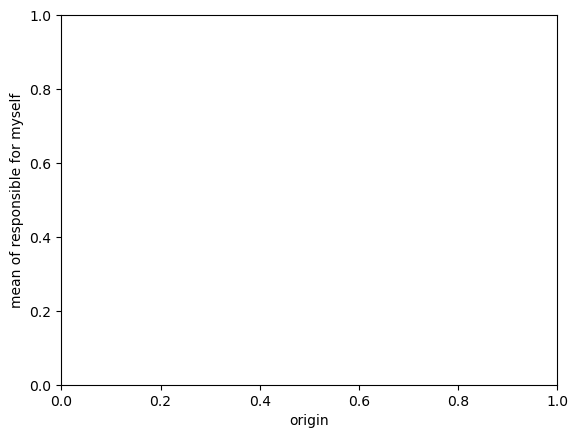

In [24]:
print(sf_df)


# List of emotions to analyze
emotions = ['motivation', 'responsible for others', 'responsible for myself']

# Loop through each emotion and create interaction plot
for emotion in emotions:
    print(f"Processing emotion: {emotion}")
    try:
        plt.figure(figsize=(8, 6))
        
        # Generate the interaction plot for the specific emotion
        interaction_plot(
            sf_df['origin'],          # x-axis (self-success or self-failure)
            sf_df['language'],        # Grouping variable (English or Japanese)
            sf_df[emotion],           # Dependent variable (emotion score)
            colors=['#1f77b4', '#ff7f0e'],  # Colors for each language group
            markers=['D', '^'],       # Markers for each language group
            ms=10                     # Marker size
        )
        
        # Customize plot labels and title
        plt.xlabel('Origin')
        plt.ylabel('Mean Score')
        plt.title(f'Interaction Plot for {emotion}')
        plt.grid(True)
        plt.legend(title='Language')
        plt.show()
    except KeyError as e:
        print(f"KeyError for emotion '{emotion}': {e}")

